# Fit the data
- We take into account the component $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$
    - Background $B^0 \to D^{*-} D_s^+$ with simultaneous fit on $m(D_s\to 3\pi)$
    - Background of misidentified pions: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
    - Background of partially reconstructed decays $B^0 \to D^{*-} \pi^+ \pi^+ \pi^- h$
    - Combinatorial background (exponential)

## Import

In [1]:
import zfit
import json
import numpy as np

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


## Load

In [2]:
with open(f'{loc.JSON}/MC_params.json', 'r') as f:
    MC_param_results = json.load(f)

In [3]:
df_data = fct.load_data(years, magnets, type_data='data', vars=['B0_M','tau_M'],
                            cut_DeltaM=False, cut_PIDK=False)

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/data/data_90000000_2015_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/data/data_90000000_2015_down.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/data/data_90000000_2016_up.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/data/data_90000000_2016_down.root


In [4]:
len(df_data)

31551

In [5]:
df = {}

In [6]:
name_data = 'data'

## Distributions

### Init

In [7]:
# mass of Ds: 1,968 MeV
size_tau_M = 80.
low_tau_M = 1970. - size_tau_M
high_tau_M = 1970. + size_tau_M

In [8]:
low = 5150.
high = 5390.

### Distribution $m(D_s\to3\pi)$

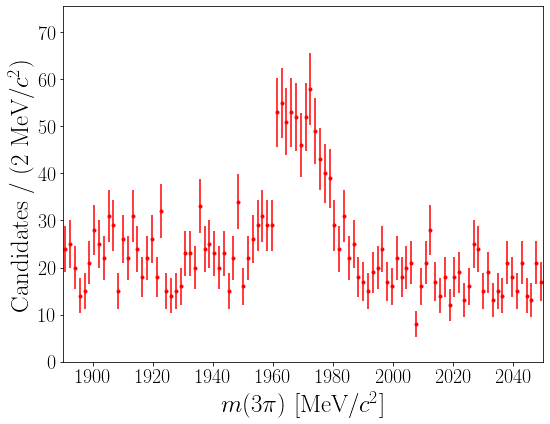

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_data.pdf


In [12]:
fct.plot_hist_particle({name_data:df_data},'tau_M',
              low = low_tau_M, high = high_tau_M,
              n_bins = 100, mode_hist = False)

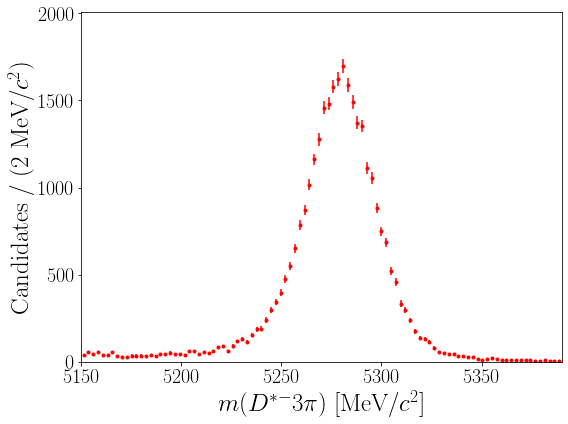

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_data_strip_cutDeltaM.pdf


In [13]:
fct.plot_hist_particle({'data_strip_cutDeltaM':df_data},'B0_M',
              low = low, high = high,
              n_bins = 100, mode_hist = False)

## Simultaneous fit on $m(D_s\to3\pi)$ and $m(B^0)$

### Values for the fit $m(D_s\to3\pi)$

In [9]:
n_events_tau_M_v = len(df_data.query(f'tau_M > {low_tau_M} and tau_M < {high_tau_M}'))

# n_sig_tau       436.6     +/-      34  -     34   +     34       False
# n_bkg_tau        1993     +/-      52  -     52   +     52       False
# mu_tau           1969     +/-    0.65  -   0.65   +   0.65       False
# sigma_tau       7.873     +/-    0.62  -    0.6   +   0.62       False
# lambda_tau  -0.002142     +/- 0.00049  -0.00049   +0.00049       False

d_initial_values_tau = { # it seems that this one works with almost every BDT cut....
    'mu_tau': {
        'value' : 1969.,
        'low': 1965.,
        'high': 1975.,     
    },
    'sigma_tau': {
        'value' : 10.,
        'low': 5.,
        'high': 20.,
    },
    'n_bkg_tau': {
        'value' : 1993,
        'low': 0,
        'high': n_events_tau_M_v,  
    },
    'n_sig_tau': {
        'value' : 437,
        'low': 0,
        'high': n_events_tau_M_v,  
    },
    'lambda_tau': {
        'value' : -0.002,
        'low': -0.01,
        'high': -0.0001  
    }
}

### Values for the fit $m(B^0)$

In [10]:
n_events_B0_M_k = len(df_data.query(f'B0_M > {low} and B0_M < {high}'))

n_sig_k = 29000
n_bkg_k = 1800

# name            value    minuit_hesse         minuit_minos    at limit
# ----------  ---------  --------------  -------------------  ----------
# n_sig           29220     +/-   2e+02  -1.9e+02   +  2e+02       False
# n_bkg            1874     +/- 1.1e+02  -1.3e+02   +     89       False
# alphaL          1.247     +/-   0.071  -   0.03   +   0.06       False
# nL              1.555     +/-   0.051  -  0.051   +  0.051       False
# mu               5280     +/-    0.15  -   0.15   +   0.15       False
# alphaR             20     +/-    0.14  -     16   +     16        True
# nR                100     +/-     4.8  -     67   +     67       False
# sigma           16.72     +/-    0.18  -   0.17   +   0.18       False
# lambda      -0.008427     +/- 0.00062  -0.00062   +0.00062       False


d_initial_values = {
    'mu'       :{ 'value': 5280.                        , 'low': 5280.-2.                     , 'high': 5280.+3.                    , 'floating': True},
    'sigma'    :{ 'value': 17.                          , 'low': 17.-2.                       , 'high': 17.+2.                      , 'floating': True},
    'alphaL'   :{ 'value': 1.26                         , 'low': 0.1                          , 'high': 5.                          , 'floating': True},
    'alphaR'   :{ 'value': 16.25                        , 'low': 1.                           , 'high': 30.                         , 'floating': True},
    'nL'       :{ 'value': 1.6                          , 'low': 0.1                          , 'high': 5.                          , 'floating': True},
    'nR'       :{ 'value': 32.                          , 'low': 1.                           , 'high': 110.                        , 'floating': True},
    'n_sig'    :{ 'value': n_sig_k                      , 'low': 0.                           , 'high': n_events_B0_M_k             , 'floating': True},
    'lambda'   :{ 'value': -0.009                       , 'low': -0.05                       , 'high': -0.0008                      , 'floating': True},
    'n_bkg'    :{ 'value': n_bkg_k                      , 'low': 0.                           , 'high': n_events_B0_M_k             , 'floating': True},
}


In [11]:
print(MC_param_results['nL_MC'])

1.646374921465709


## Simultaneous fit

### Observables and variables

In [12]:
obs_tau = zfit.Space("x", limits=(low_tau_M, high_tau_M))
zparams_tau = {}

initial_values_tau = d_initial_values_tau

for var_tau in initial_values_tau.keys():
    zparams_tau[var_tau] = zfit.Parameter(f"{var_tau}", initial_values_tau[var_tau]['value'], 
                                     initial_values_tau[var_tau]['low'], initial_values_tau[var_tau]['high'])

In [13]:
obs = zfit.Space("x", limits=(low, high))
initial_values = d_initial_values
zparams = {}
for var in initial_values.keys():
    zparams[var] = zfit.Parameter(f"{var}",
                                  initial_values[var]['value'], 
                                  initial_values[var]['low'], 
                                  initial_values[var]['high'],
                                  floating = initial_values[var]['floating'])
    #print(zparams[var])

In [14]:
name_params_tau = {
    f'mu_tau'    :'$\mu_{m_{D_s}}$',
    f'sigma_tau' :'$\sigma_{m_{D_s}}$',
    f'n_bkg_tau' :'$n_{bkg}$',
    f'n_sig_tau' :'$n_{sig,D_s}$',
    f'lambda_tau':'$\\lambda$',
}

name_params = {
    f'mu'      : '$\mu$',
    f'sigma'   : '$\sigma$',
    f'alphaL'  : '$\\alpha_L$',
    f'alphaR'  : '$\\alpha_R$',
    f'nL'      : '$n_L$',
    f'nR'      : '$n_R$',
    f'n_bkg'   : '$n_{bkg}$',
    f'n_sig'   : '$n_{sig}$',
    f'lambda'  : '$\\lambda$',
    f'mu2'     : '$\\mu_2$',
    f'sigma2'  : '$\\sigma_2$',
    f'n_bkg2'  : '$n_{bkg2}$',
}

### PDFs

In [15]:
gaussian_tau = zfit.pdf.Gauss(zparams_tau["mu_tau"],zparams_tau["sigma_tau"],obs=obs_tau)
exponential_tau = zfit.pdf.Exponential(zparams_tau["lambda_tau"], obs=obs_tau)

gaussian_ext_tau = gaussian_tau.create_extended(zparams_tau["n_sig_tau"])
exp_ext_tau = exponential_tau.create_extended(zparams_tau["n_bkg_tau"])
model_tau = zfit.pdf.SumPDF([gaussian_ext_tau, exp_ext_tau]) # gauss is folded by frac

data_tau = zfit.Data.from_pandas(df_data['tau_M'],obs=obs_tau)

In [16]:
doubleCB = zfit.pdf.DoubleCB(zparams['mu'], zparams['sigma'],
                             zparams['alphaL'], zparams['alphaR'],
                             zparams['nL'], zparams['nR'], 
                             obs=obs)
# crystalBall = zfit.pdf.CrystalBall(zparams['mu'], zparams['sigma'],zparams['alphaL'], zparams['nL'], obs=obs)

exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)

doubleCB_Ds = zfit.pdf.DoubleCB(zparams['mu'], zparams['sigma'], 
                                zparams['alphaL'], zparams['alphaR'], 
                                zparams['nL'], zparams['nR'], 
                                obs=obs)
# crystalBall_Ds = zfit.pdf.CrystalBall(zparams['mu'], zparams['sigma'],zparams['alphaL'], zparams['nL'], obs=obs)



# sum of the two PDFs
doubleCB_ext = doubleCB.create_extended(zparams['n_sig'])
exp_ext = exponential.create_extended(zparams['n_bkg'])
doubleCB_Ds_ext = doubleCB_Ds.create_extended(zparams_tau['n_sig_tau'])
# crystalBall_ext = crystalBall.create_extended(zparams['n_sig'])
# crystalBall_Ds_ext = crystalBall_Ds.create_extended(zparams['n_bkg'])
                               
model = zfit.pdf.SumPDF([doubleCB_ext, exp_ext, doubleCB_Ds_ext]) # gauss is folded by frac
data = zfit.Data.from_pandas(df_data['B0_M'], obs=obs)

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:392: UserWarning: The function <function Space.limits at 0x7fa73ce824d0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5390.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:35: UserWarning: The function <function Space.area at 0x7fa73ce8a8c0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5390.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins
findfont: Font family ['serif'] not found. Falling back to Dej

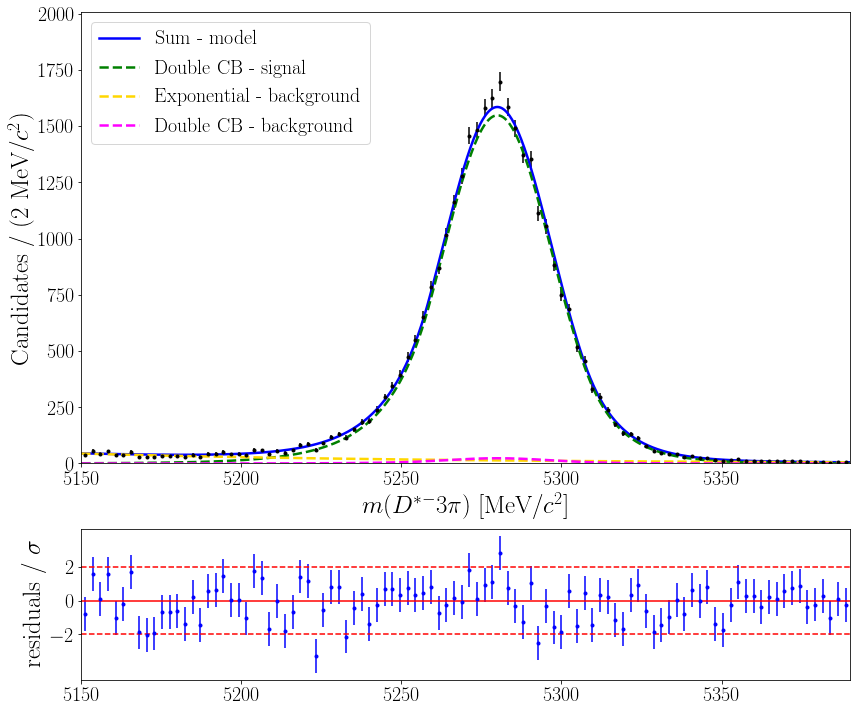

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_test/B0_M_data_strip_cutDeltaM_test_fit.pdf


In [17]:

# n_sig_k = 108000.
# n_bkg_k = 86800.
# n_bkg2_k = 35000.

# zparams['n_sig'].set_value(n_sig_k)
# zparams['n_bkg'].set_value(n_bkg_k)


# zparams['lambda'].set_value(-0.0009)

plot_hist_fit_particle(df_data,'B0_M', models = [model,doubleCB_ext,exp_ext, doubleCB_Ds_ext], 
              obs=obs, n_bins = 100,mode_hist = False,
              name_data = 'data strip cutDeltaM_test')

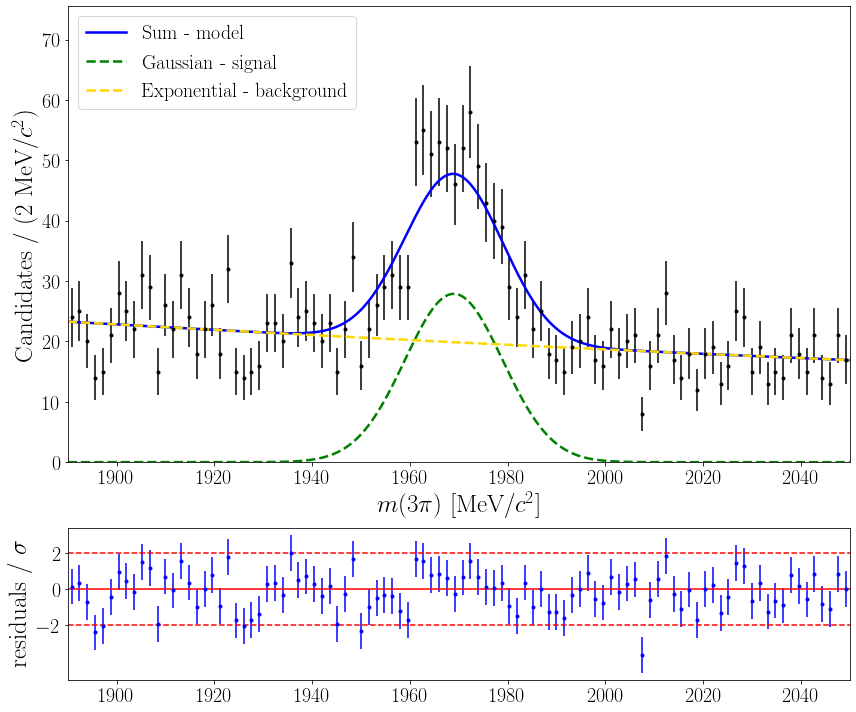

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_test/tau_M_data_test_fit.pdf


In [18]:
n_sig_tau_k = 35000.
n_bkg_tau_k = 35000.
zparams['n_sig'].set_value(n_sig_k)

plot_hist_fit_particle(df_data,'tau_M', models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
              obs=obs_tau, n_bins = 100,mode_hist = False,
              name_data = name_data+' test')

### Fitting

In [22]:
result, params = launch_fit([model_tau, model], [data_tau, data], extended=True)

------------------------------------------------------------------
| FCN = -1.55e+05               |     Ncalls=349 (349 total)     |
| EDM = 0.000359 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name            value    minuit_hesse         minuit_minos    at limit
----------  ---------  --------------  -------------------  ----------
n_sig_tau       436.8     +/-      34  -     34   +   

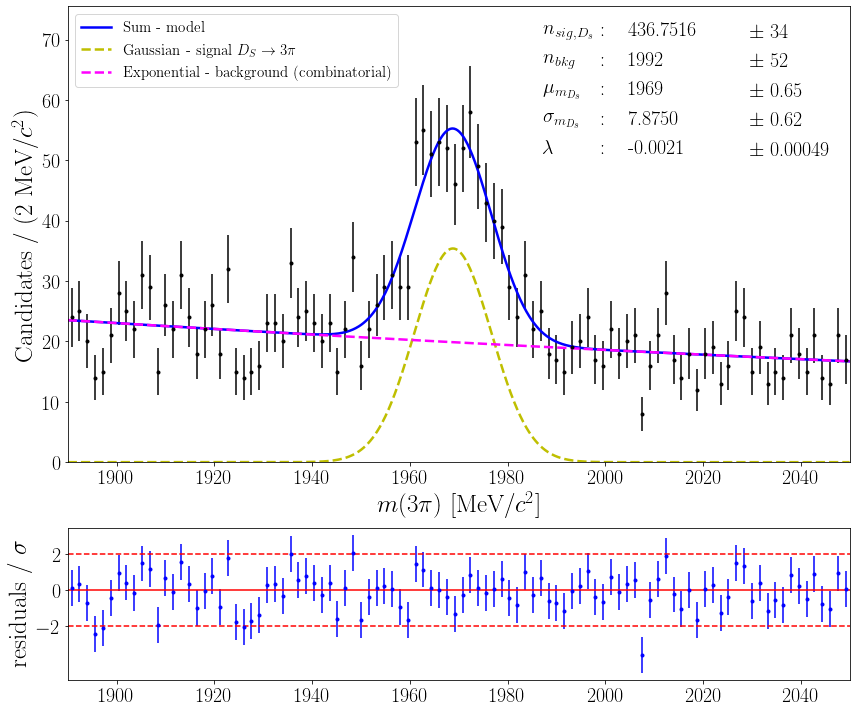

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data/tau_M_data_fit.pdf


In [31]:
plot_hist_fit_particle(df_data,'tau_M',models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                       name_models = [None, '$D_S \\to 3\pi$','(combinatorial)'], fontsize_leg=15,
              obs=obs_tau, n_bins = 100,mode_hist = False, name_data=name_data, colors = ['b','y','magenta'],
              params=params, name_params=name_params_tau)

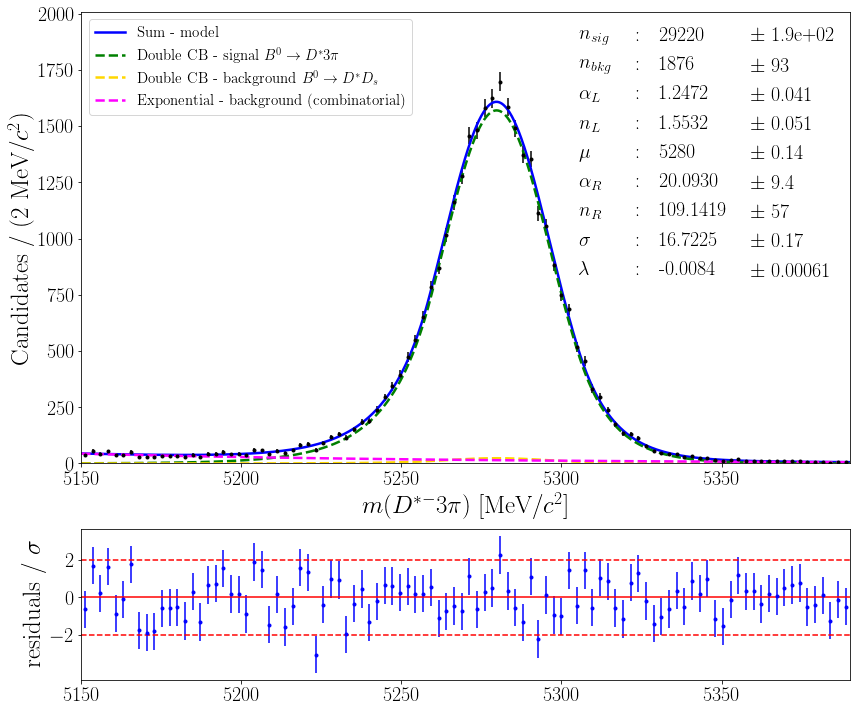

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data/B0_M_data_fit.pdf


In [34]:
plot_hist_fit_particle(df_data,'B0_M', models = [model, doubleCB_ext, doubleCB_Ds_ext,exp_ext],
                       name_models = [None, '$B^0\\to D^* 3\pi$','$B^0\\to D^*D_s$', '(combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False, fontsize_leg=15,
                       name_data = name_data, colWidths=[0.04,0.01,0.06,0.06],
                       params=params,name_params=name_params)

In [ ]:
#save_params(params,f'cut_PID_BDT{cut_BDT}',True)